In [3]:
import torch
import torch as nn
import numpy as np 

In [4]:
seed = 123
np.random.seed(seed)
torch.manual_seed(seed)

def synthetic_data(mu: int, sigma: float, N: int) -> np.ndarray:
    """
    Generate x samples from a Guassian distribution N(mean=0, std=1)
    mu: mean, sigma: standard deviation, N = size of dataset
    """

    return np.random.normal(loc=mu, scale=sigma, size=N)

x: np.ndarray = synthetic_data(mu=0, sigma=1, N=5000)

# ### (b) ####
# sigma = sqrt(variance) , var=0.25
eps: np.ndarray = synthetic_data(mu=0, sigma=0.5, N=5000)

# ### (c) ####
y: np.ndarray = 1 - (0.5*x) + (2*x**2) - (0.3*x**3) + eps

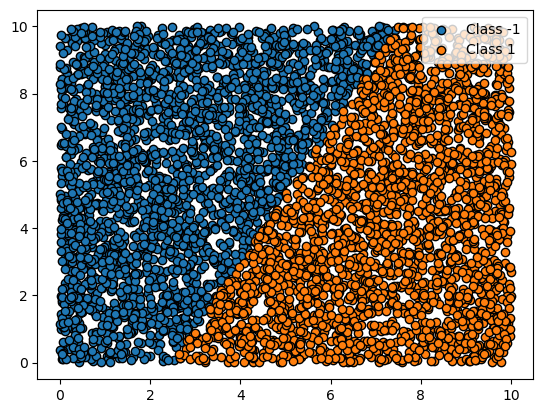

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.random.rand(5000, 2) * 10  # [0,10]

# Linear boundary: y = 2x1 -x2 - 1
# y_values = 2 * X[:, 0] -  X[:, 1] - 5
y_values = 2 * X[:, 0] -  X[:, 1] - 5
labels = (y_values > 0).astype(int) # class label
# print(labels)

class_1 = []
class_2 = []
# Plot the points
for label in np.unique(labels):
    plt.scatter(X[labels == label, 0], X[labels == label, 1], label=f"Class {-1 if label == 0 else 1}", edgecolors="k")
plt.legend()
plt.show()


class1 [[7.48267981 1.80202707]
 [3.89023145 0.37600182]
 [4.88196658 3.72024764]
 [7.0575272  0.01556198]
 [7.71226673 1.11482745]
 [9.4863268  3.32736084]
 [4.51102775 0.04980906]
 [8.24392688 3.08168254]]


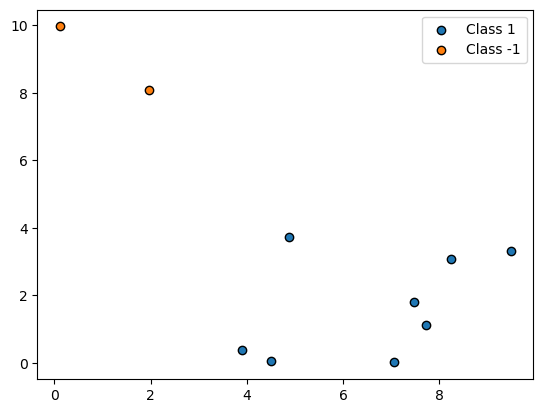

In [6]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(10, 2) * 10  # [0,10]

# Linear boundary: y = 2x1 -x2 - 1
y = 2 * X[:, 0] - X[:, 1] - 5
labels = (y > 0).astype(int)  # class label

class_1 = X[labels == 1]
# x_1, y_1 = class_1[:, 0], class_1[:, 1]
# print("x1", x_1)
class_2 = X[labels == 0]

print("class1", class_1)

plt.scatter(class_1[:, 0], class_1[:, 1], label="Class 1", edgecolors="k")
plt.scatter(class_2[:, 0], class_2[:, 1], label="Class -1", edgecolors="k")
plt.legend()
plt.show()


In [7]:
from sklearn.model_selection import KFold, train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.50, random_state=42)  # Change the test size to 50 to 80%

def cross_validation(x, y, split_size):
    folds = KFold(n_splits=split_size)

    for train_index, test_index in folds.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

    return x_train, x_test, y_train, y_test

In [8]:
# print(len(X), len(y_values))
# print(len(labels))
# print(labels)
x_train, x_test, y_train, y_test = cross_validation(X, labels, 10)
# print(X.shape)

In [26]:
class Perceptron():
    def __init__(self, num_features, act_type="perceptron", lr=0.01):
        self.num_features = num_features
        self.activation = act_type
        self.learning_rate = lr
        self.weights = np.zeros((num_features, 1), dtype=float)

    def forward(self, x):
        linear = np.dot(x, self.weights)
        predictions = np.where(linear > 0., 1., 0.)
        # print("pred1: ", predictions)
        # predictions = np.sign(np.dot(x, self.weights))
        # predictions = self.sigmoid(np.dot(x, self.weights))
        # predictions = self.activations(np.dot(x, self.weights))
        # predictions = self.activations(linear)
        # print("predictions", predictions)

        # print(predictions)
        # np.sign(np.dot(x, self.w))
        return predictions # returns 0 or 1
    
    # def sigmoid(self, z):
    #     return 1 / (1 + np.exp(-z))
    
    # def activations(self, x):
    #     if self.activation == "perceptron":
    #         self.activation = np.sign(x)
    #     if self.activation == "adaline":
    #         self.activation = x
    #     if self.activation == "perceptron":
    #         self.activation = self.sigmoid(x)

    #     return self.activation

        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        print("Started training")
        loss = []
        for e in range(epochs):
            
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += self.learning_rate * (errors * x[i]).reshape(self.num_features, 1)

                print(f"x: {x[i]}, y: {y[i]}")
                print(f"Epochs: {e+1}, Loss: {errors}, Weight: {self.weights}")
                loss.append(errors)
        return loss
        
                
    def evaluate_model(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy

In [27]:
ppt = Perceptron(num_features=2)

losses = ppt.train(x_train, y_train, epochs=1)

# print('Model parameters:\n\n')
# print('  Weights: %s\n' % ppn.weights)
# print('  Bias: %s\n' % ppn.bias)

print("Model parameters")
print(f"Weight: {ppt.weights}")

Started training
x: [7.48267981 1.80202707], y: 1
Epochs: 1, Loss: [1.], Weight: [[0.0748268 ]
 [0.01802027]]
x: [3.89023145 0.37600182], y: 1
Epochs: 1, Loss: [0.], Weight: [[0.0748268 ]
 [0.01802027]]
x: [0.11787739 9.96267872], y: 0
Epochs: 1, Loss: [-1.], Weight: [[ 0.07364802]
 [-0.08160652]]
x: [4.88196658 3.72024764], y: 1
Epochs: 1, Loss: [0.], Weight: [[ 0.07364802]
 [-0.08160652]]
x: [1.96172095 8.07192245], y: 0
Epochs: 1, Loss: [0.], Weight: [[ 0.07364802]
 [-0.08160652]]
x: [7.0575272  0.01556198], y: 1
Epochs: 1, Loss: [0.], Weight: [[ 0.07364802]
 [-0.08160652]]
x: [7.71226673 1.11482745], y: 1
Epochs: 1, Loss: [0.], Weight: [[ 0.07364802]
 [-0.08160652]]
x: [9.4863268  3.32736084], y: 1
Epochs: 1, Loss: [0.], Weight: [[ 0.07364802]
 [-0.08160652]]
x: [4.51102775 0.04980906], y: 1
Epochs: 1, Loss: [0.], Weight: [[ 0.07364802]
 [-0.08160652]]
Model parameters
Weight: [[ 0.07364802]
 [-0.08160652]]


In [28]:
test_acc = ppt.evaluate_model(x_test, y_test)
print(f'Train set accuracy: {test_acc*100}')

Train set accuracy: 100.0


In [ ]:
import numpy as np

class PocketPerceptron():
    def __init__(self, num_features, lr=0.01):
        self.num_features = num_features
        self.learning_rate = lr
        self.weights = np.zeros((num_features, 1), dtype=float)
        # self.weights = np.random.normal(num_features, 1)
        self.best_weights = self.weights.copy()  
        self.best_error_count = float('inf')

    def forward(self, x):
        linear = np.dot(x, self.weights)
        predictions = np.where(linear > 0., 1., 0.)
        return predictions  # returns 0 or 1

    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors

    def train(self, x, y, epochs):
        loss = []
        for epoch in range(epochs):
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += self.learning_rate * (errors * x[i]).reshape(self.num_features, 1)
                
                # Number of misclassifications
                current_predictions = self.forward(x)
                current_error_count = np.sum(y != current_predictions) # 0 if predictions == target
                
                if current_error_count < self.best_error_count:
                    self.best_error_count = current_error_count
                    self.best_weights = self.weights.copy()

                print(f"Epochs: {epoch+1}, Loss: {errors}, Weight: {self.weights}")
                loss.append(errors)

        self.weights = self.best_weights.copy()

        return loss, self.best_weights
    
    def evaluate_model(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy


In [2]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Generate random input data
# np.random.seed(0)  # For reproducibility
# n_samples = 500
# X = np.random.randint(0, 2, (n_samples, 2))

# # Compute XNOR output
# y = np.logical_not(np.logical_xor(X[:, 0], X[:, 1])).astype(int)

# # Plotting the dataset
# plt.figure(figsize=(8, 6))
# for x, label in zip(X, y):
#     color = 'blue' if label == 1 else 'red'
#     plt.scatter(x[0], x[1], color=color)

# plt.xlabel("Input 1")
# plt.ylabel("Input 2")
# plt.title("XNOR Dataset")
# plt.grid(True)
# plt.show()
